# Learning Long-Term Gains (Reinforcement)

The Markov player considered only the immediate reward by choosing the best
move to win this round. A smarter player could instead consider a longer term
strategy, such as adversarially tricking the opponent into using a specifc
pattern that they can later exploit.

Let's try to simulate such a player with reinforcement learning. For a first
naive formulation we will use:
- Past N opponent moves as the state.
- Q update rules at each step.
- Optionally choose to explore with a random move in some rounds.

In [1]:
import sys
import os
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

sys.path.append(os.path.abspath(os.path.join('..')))

from rps.state.tournament import play_tournament
from rps.players.weighted import Weighted
from rps.players.markov import Markov
from rps.players.reinforce import Q

As with the Markov player, we don't expect the Q-learning player to outperform a random player.


Randy             vs             Queenie



████████████████████████████████████████


Tournament Stats:
Randy            Draw            Queenie
33.42            32.72             33.86
----------------------------------------



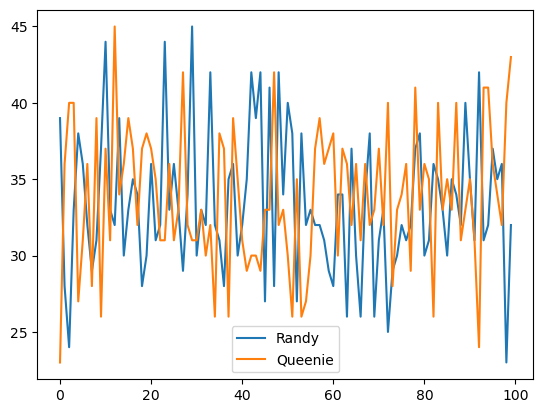

In [2]:
randy = Weighted(name="Randy")
queen = Q(name="Queenie", num_moves=2)
play_tournament(randy, queen, num_games=100, num_rounds=100, print_plot=True)

Against a very predictable player such as Scissorshands, our Q player slightly 
underperforms compared to the Markov player, due to the possibility of making
random 'exploration' moves.


Scissorhands          vs         Queenie



████████████████████████████████████████


Tournament Stats:
Scissorhands         Draw        Queenie
21.16            24.39             54.45
----------------------------------------



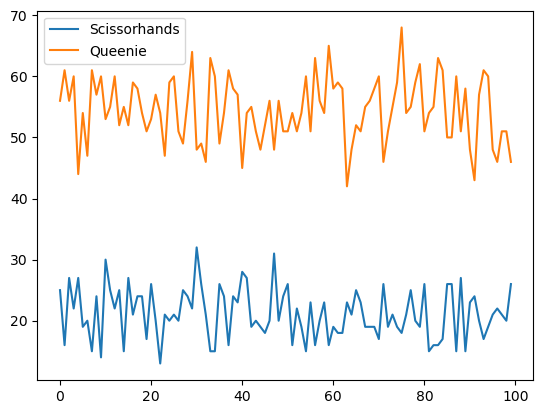

In [3]:
scissorhands = Weighted(name="Scissorhands", weights=[2,2,6])
queen = Q(name="Queenie", num_moves=2)
play_tournament(scissorhands, queen, num_games=100, num_rounds=100, print_plot=True)

Now the interesting question. Using the same history window size, can the Q player beat the Markov player?


Mark              vs             Queenie



████████████████████████████████████████


Tournament Stats:
Mark             Draw            Queenie
31.48            31.63             36.89
----------------------------------------



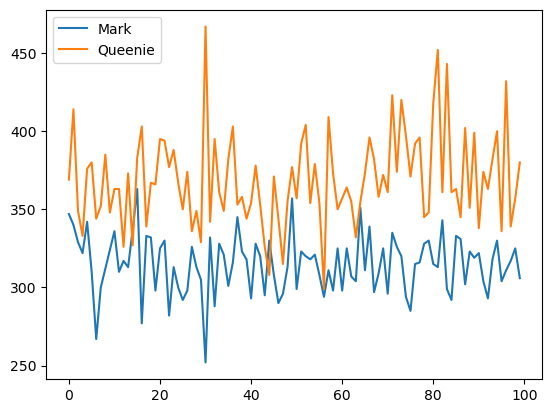

In [4]:
mark = Markov(name="Mark", num_moves=2)
queen = Q(name="Queenie", num_moves=2)
play_tournament(mark, queen, num_games=100, num_rounds=1000, print_plot=True)

With this simple formulation, the Q player (Queenie) slightly outperforms the Markov player (Mark).

The Q update rule takes into account the cumulative rewards from future rounds, so it is more effective in situations where each move has a lasting effect on the rest of the game, eg. in chess.

Here Mark's move only depends on Queenie's last two moves. Queenie's move depends on Mark's last two moves, as well as the sucessive states that follow from Mark's two moves, and hence was able to learn Mark's strategy.

Let's try to adjust Queenie's hypeparameters.


Mark              vs             Queenie



████████████████████████████████████████



Tournament Stats:
Mark             Draw            Queenie
31.28            31.35             37.37
----------------------------------------



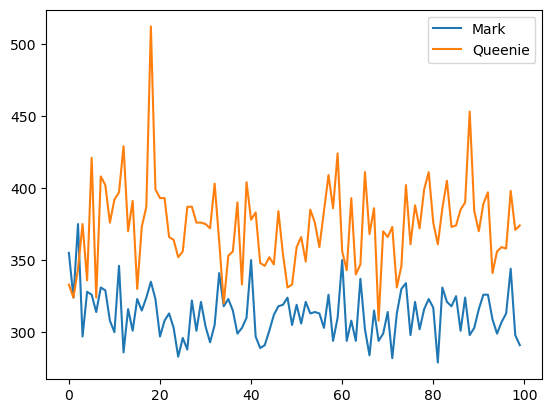

In [5]:
mark = Markov(name="Mark", num_moves=2)
queen = Q(name="Queenie", num_moves=2, discount_rate=0.99, learning_rate=0.2)
play_tournament(mark, queen, num_games=100, num_rounds=1000, print_plot=True)

What if Mark has a longer state window?


Mark 4                                vs                               Queenie 2



████████████████████████████████████████████████████████████████████████████████



Tournament Stats:
Mark 4                               Draw                              Queenie 2
34.16                                31.45                                 34.38
--------------------------------------------------------------------------------



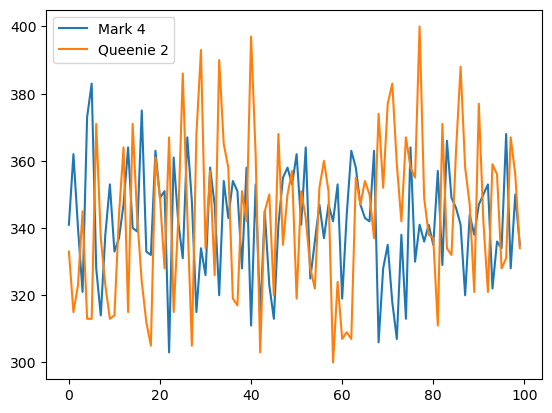


Mark 6                                vs                               Queenie 2



████████████████████████████████████████████████████████████████████████████████


Tournament Stats:
Mark 6                               Draw                              Queenie 2
35.97                                31.70                                 32.33
--------------------------------------------------------------------------------



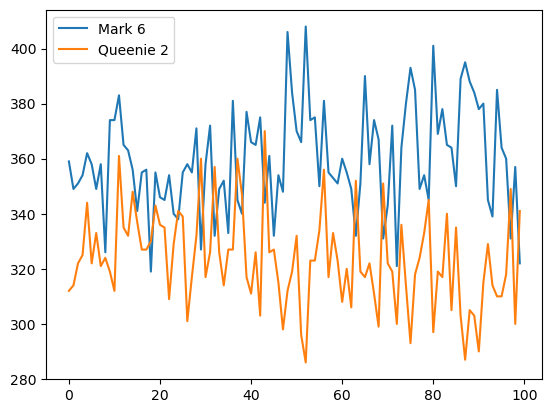


Mark 4                                vs                               Queenie 4



████████████████████████████████████████████████████████████████████████████████



Tournament Stats:
Mark 4                               Draw                              Queenie 4
31.17                                33.23                                 35.60
--------------------------------------------------------------------------------



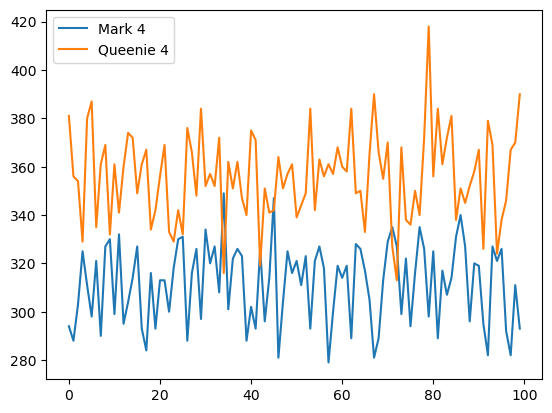

In [6]:
mark4 = Markov(name="Mark 4", num_moves=4)
mark6 = Markov(name="Mark 6", num_moves=6)
queen2 = Q(name="Queenie 2", num_moves=2)
queen4 = Q(name="Queenie 4", num_moves=4)
play_tournament(mark4, queen2, num_games=100, num_rounds=1000, print_plot=True, w=80)
play_tournament(mark6, queen2, num_games=100, num_rounds=1000, print_plot=True, w=80)
play_tournament(mark4, queen4, num_games=100, num_rounds=1000, print_plot=True, w=80)

Queenie's advantage is eliminated for every 2 moves that Mark remembers.